#**Movie Rating PREDICTION USING PYTHON**

---



# Importing Dependecies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading Dataset

In [ ]:
dataset = pd.read_csv('IMDb_Movies_India.csv',encoding='latin1')
dataset.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating
0,,NaN,NaN,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0
2,#Homecoming,-2021.0,90.0,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,NaN
3,#Yaaram,-2019.0,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.4
4,...And Once Again,-2010.0,105.0,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,NaN


#Data Cleaning

In [ ]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
Rating      7590
dtype: int64

In [ ]:
nulls = dataset[dataset.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5688 non-null   object 
 1   Year      5688 non-null   float64
 2   Duration  5688 non-null   float64
 3   Genre     5659 non-null   object 
 4   Votes     5688 non-null   object 
 5   Director  5688 non-null   object 
 6   Actor 1   5688 non-null   object 
 7   Actor 2   5688 non-null   object 
 8   Actor 3   5688 non-null   object 
 9   Rating    5688 non-null   float64
dtypes: float64(3), object(7)
memory usage: 488.8+ KB


Removing extra Characters from Name

In [ ]:
dataset['Name'] = dataset['Name'].str.extract('([A-Za-z\s\'\-]+)')


Spliting Genres into single Genre

In [ ]:
dataset['Genre'] = dataset['Genre'].str.split(', ')
dataset = dataset.explode('Genre')
dataset['Genre'].fillna(dataset['Genre'].mode()[0], inplace=True)

In [ ]:
# Convert 'Votes' column to numeric after removing commas
dataset.loc[:, 'Votes'] = pd.to_numeric(dataset['Votes'].astype(str).str.replace(',', ''), errors='coerce')

# Convert 'Year' column to numeric after removing dashes
dataset.loc[:, 'Year'] = pd.to_numeric(dataset['Year'].astype(str).str.replace('-', ''), errors='coerce')

dataset

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,Gadhvi,2019.0,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0,6.420152,7.000,6.850000,7.000000,7.000
10,An Ode to Lost Love,2004.0,96.0,Drama,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,6.2,6.420152,6.200,5.766667,5.100000,6.200
11,Ek Tera Saath,2016.0,120.0,Horror,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,5.9,4.698529,5.900,5.900000,5.900000,5.900
30,Park Avenue,2005.0,116.0,Drama,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose,7.1,6.420152,6.525,6.900000,6.866667,5.700
32,th August,1993.0,168.0,Drama,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor,5.6,6.420152,5.400,5.600000,6.400000,5.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,Zindagi Tere Naam,2012.0,120.0,Romance,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta,4.4,5.535593,4.400,5.231818,5.450000,4.400
15479,Zindagi Tumse,2019.0,120.0,Family,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri,6.0,6.407143,6.000,6.000000,6.000000,6.000
15482,Zindagi Zindabad,2000.0,140.0,Drama,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji,5.7,6.420152,5.700,5.700000,5.700000,6.000
15488,Zoo,2018.0,100.0,Drama,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta,5.7,6.420152,5.700,5.700000,5.700000,5.700


Removing Duplicate Values

In [ ]:
dataset = dataset.drop_duplicates(subset=['Name'], keep=False)

Summarizing the Data

In [ ]:
dataset.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1528,1528,1528,1528,1528,1528
unique,1528,20,1114,1010,1131,1154
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,789,13,22,12,16


This dataset does not contain any Null Values.

In [ ]:
genre_mean_rating = dataset.groupby('Genre')['Rating'].transform('mean')
dataset.loc[:,'Genre_mean_rating'] = genre_mean_rating

director_mean_rating = dataset.groupby('Director')['Rating'].transform('mean')
dataset.loc[:,'Director_encoded'] = director_mean_rating

actor1_mean_rating = dataset.groupby('Actor 1')['Rating'].transform('mean')
dataset.loc[:,'Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = dataset.groupby('Actor 2')['Rating'].transform('mean')
dataset.loc[:,'Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = dataset.groupby('Actor 3')['Rating'].transform('mean')
dataset.loc[:,'Actor3_encoded'] = actor3_mean_rating


In [ ]:
X = dataset[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = dataset['Rating']

# Spilitting the Dataset into Training & Test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

#Analysis

##Average Movie Ratings Over the Years

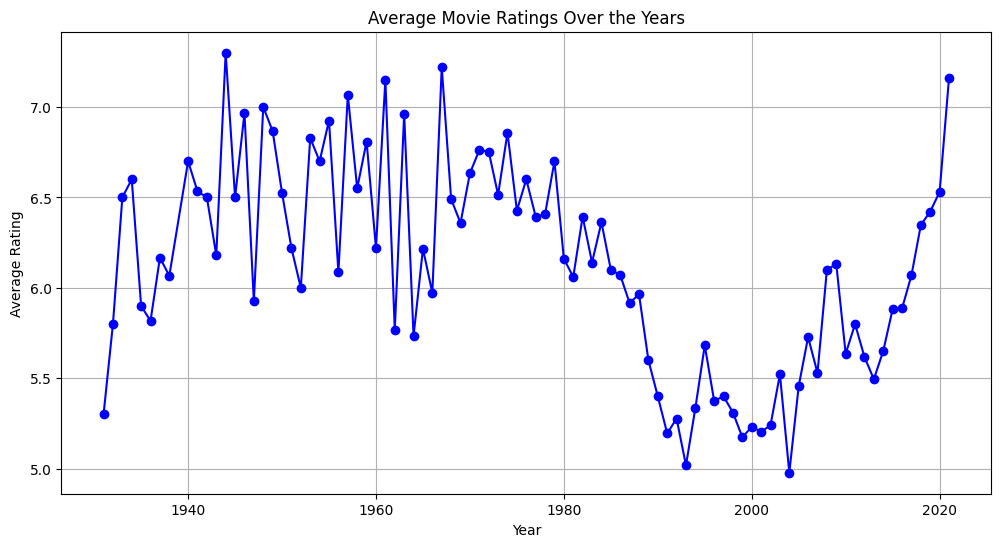

In [ ]:
# Group the data by 'Year' and calculate the average rating for each year
ratings_by_year = dataset.groupby('Year')['Rating'].mean().reset_index()

# Plotting the trend of average ratings over the years
plt.figure(figsize=(12, 6))
plt.plot(ratings_by_year['Year'], ratings_by_year['Rating'], marker='o', color='b', linestyle='-')

plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
#plt.xticks(ratings_by_year['Year'].unique())  # Display all years on x-axis
plt.show()

##Average Ratings by Genre

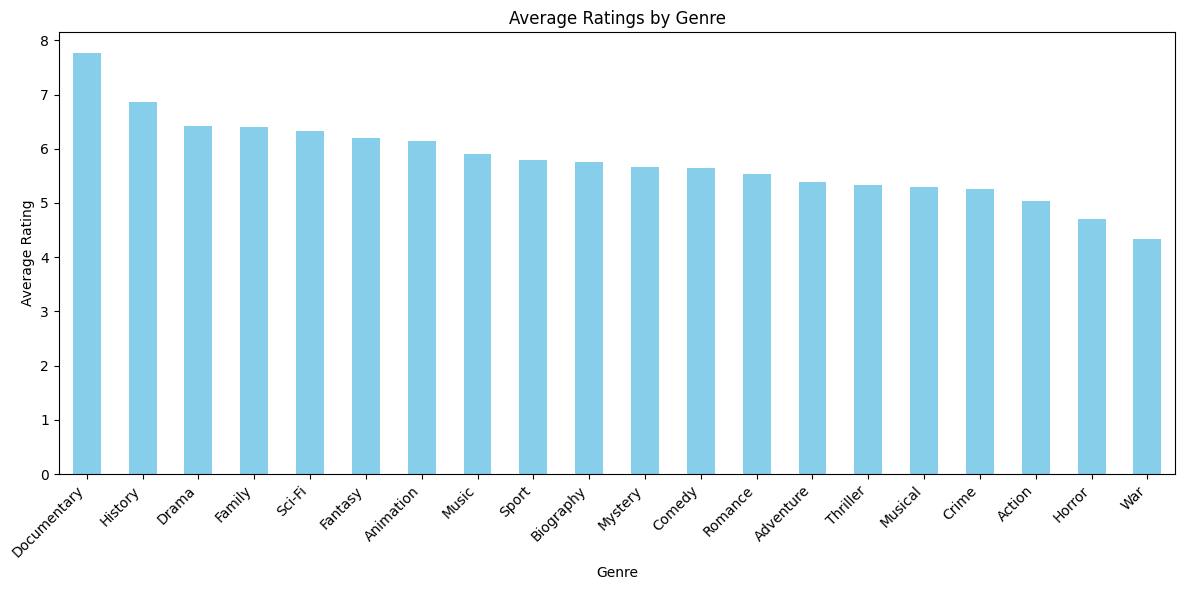

In [ ]:
genre_avg_ratings = dataset.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plotting the average ratings for each genre
plt.figure(figsize=(12, 6))
genre_avg_ratings.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Relationship between Movie Duration and Rating

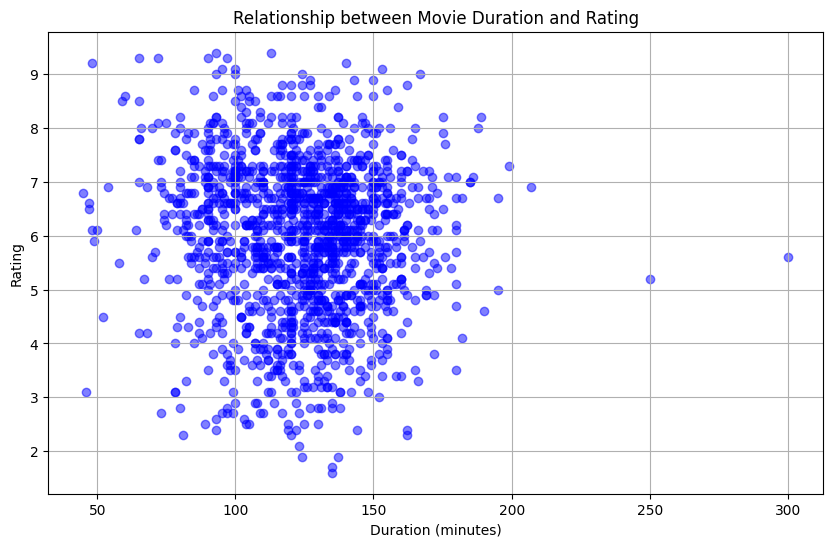

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Duration'], dataset['Rating'], alpha=0.5, color='b')
plt.title('Relationship between Movie Duration and Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

#Polynomial Regression

# Training the Dataset using Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Testset

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_test)
print()
print(y_pred)

4699     5.1
10168    2.7
11471    3.6
1312     3.7
9004     4.2
        ... 
10373    8.5
1434     3.6
4943     7.3
458      6.7
8471     4.5
Name: Rating, Length: 306, dtype: float64

[4.91 2.27 4.28 4.22 4.57 6.54 6.28 4.88 6.52 6.68 7.04 4.95 5.83 5.91
 8.34 8.48 4.81 6.14 6.15 5.52 5.32 6.22 5.24 4.09 5.82 4.42 5.94 6.5
 4.85 6.33 8.42 6.94 7.8  7.94 5.9  5.17 6.77 6.26 6.19 8.34 5.96 6.21
 5.72 7.25 4.97 6.53 6.47 5.05 7.17 4.67 7.25 7.49 4.78 4.65 6.77 6.84
 5.67 6.5  4.89 5.78 6.13 6.42 5.91 5.92 4.79 6.23 8.11 6.76 7.71 9.71
 6.64 5.68 5.36 6.7  7.21 6.79 4.67 6.18 4.21 4.59 6.77 3.97 4.61 4.69
 5.79 6.55 6.53 9.56 3.77 6.43 4.82 6.02 7.17 5.6  6.77 5.87 5.88 8.37
 3.57 6.66 2.3  6.86 6.28 7.33 5.12 5.6  4.61 7.48 5.51 8.93 6.22 5.94
 7.68 5.34 5.54 6.78 4.74 5.99 5.7  6.94 3.98 6.49 6.85 6.36 5.58 4.69
 3.32 7.48 9.4  7.6  4.89 6.82 7.69 5.29 6.18 6.91 4.51 6.53 5.68 5.08
 5.91 5.31 5.71 5.84 9.65 9.   5.15 6.19 5.86 8.21 7.13 5.44 6.01 7.33
 6.77 4.04 5.79 5.44 5.91 4.25 3.6

# Plotting the values of Actual vs Predicted data

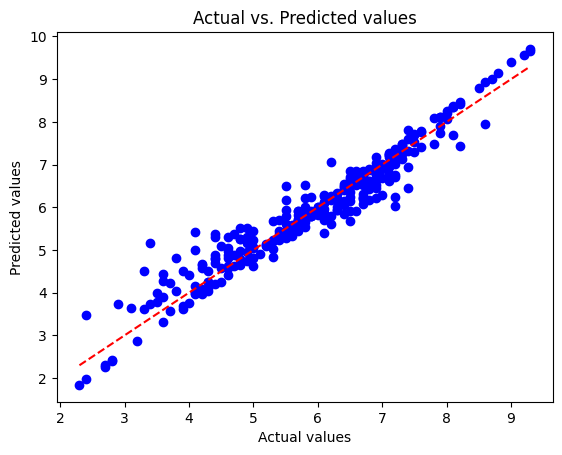

In [ ]:
# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()

# Model Performance

In [ ]:
# Assuming 'regressor' is your LinearRegression model
y_pred = regressor.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)


Accuracy: 0.926720988593957
Accuracy: 92.6720988593957


#Random Forest Regression

# Training the Dataset using Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#Predicting the Ratings

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(y_test)
print()
print(y_pred)

4699     5.1
10168    2.7
11471    3.6
1312     3.7
9004     4.2
        ... 
10373    8.5
1434     3.6
4943     7.3
458      6.7
8471     4.5
Name: Rating, Length: 306, dtype: float64

[4.81 2.7  3.84 3.88 4.5  6.5  6.1  4.41 6.6  6.6  6.9  4.84 5.83 5.9
 8.1  8.2  4.7  6.35 6.24 5.1  5.44 6.09 5.23 4.22 5.65 4.19 6.07 6.53
 4.89 6.3  8.2  6.85 7.6  8.18 6.   4.94 6.99 6.28 6.21 8.1  5.97 6.2
 5.73 7.09 4.94 6.56 6.4  5.19 7.07 4.8  7.22 7.79 4.91 4.26 6.68 6.83
 5.47 6.45 5.07 5.8  6.22 6.58 5.37 6.15 4.43 6.28 7.9  6.84 7.5  9.32
 6.92 5.7  5.37 6.6  7.12 6.64 4.28 6.12 4.39 4.64 6.91 4.2  4.79 4.82
 5.87 6.57 6.52 9.17 3.99 6.39 4.95 5.88 7.12 5.57 6.69 5.83 5.9  8.1
 3.74 6.62 2.69 7.26 6.51 7.35 5.17 5.49 4.62 7.32 5.61 8.6  6.13 5.63
 7.53 5.36 5.4  6.71 4.86 6.   6.26 7.15 4.17 6.46 6.73 6.4  5.62 4.69
 3.62 7.38 9.   7.4  4.98 6.7  7.95 5.29 6.29 7.   4.26 6.55 5.7  5.02
 5.91 5.39 5.73 5.86 9.32 8.71 5.22 6.18 5.7  8.   7.25 5.44 5.91 7.29
 6.74 3.84 5.94 5.49 6.21 4.31 3.32 

# Model Performance

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1197517712418301
R-squared: 0.937220867812957


# Plotting the values of Actual vs Predicted data

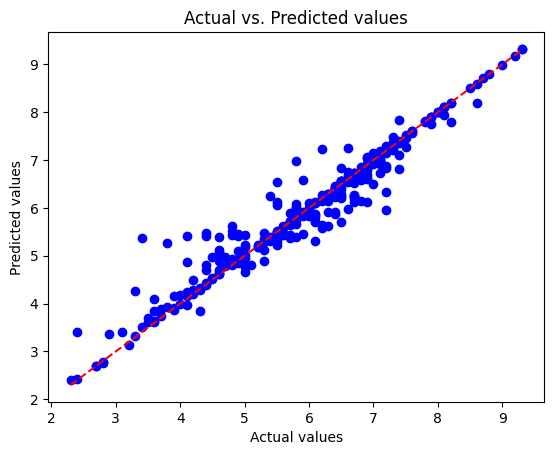

In [ ]:
# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.show()